In [1]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/wage.csv', sep=";", index_col=False).round(2)
df 

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1
...,...,...,...,...
993,35.42,18,23,1
994,36.84,16,7,1
995,41.32,16,11,1
996,47.22,18,35,1


In [3]:
X = df[['educ', 'exper']]
y = df[['wage']]
X.head()
y.head()

,wage
0,2.07
1,2.12
2,2.54
3,2.68
4,3.09


In [4]:
def train_test_valid_split(df, train_size, test_size, valid_size_min, valid_size_max):
    """Function to split the data into train, test, and validation sets.

    Input:
    - df: Pandas DataFrame containing the data.
    - train_size: Number of rows to be used as training data.
    - test_size: Number of rows to be used as test data.
    - valid_size_min: Minimum number of rows to be used as validation data.
    - valid_size_max: Maximum number of rows to be used as validation data.

    Output:
    - A split of the data into train, test, and validation sets.
    """
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size, -1]
    X_valid, y_valid = X.iloc[valid_size_min:valid_size_max], y.iloc[valid_size_min:valid_size_max, -1]
    X_test, y_test = X.iloc[test_size:], y.iloc[test_size:, -1]
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Example usage
X_train, y_train, X_valid, y_valid, X_test, y_test = train_test_valid_split(df, train_size=700, test_size=900, valid_size_min=700, valid_size_max=900)


# X_train, y_train = X.iloc[:700], y.iloc[:700, -1]
# X_valid, y_valid = X.iloc[700:900], y.iloc[700:900, -1]
# X_test, y_test = X.iloc[900:], y.iloc[900:, -1]


In [5]:
print("Der X Test Datensatz besthet aus: ", X_train.shape, "Der Y Test Datensatz besthet aus: ", y_train.shape)
print("Der X_test Datensatz besthet aus: ", X_test.shape,"Der y_test Datensatz besteht  aus: ", y_test.shape)
print("X_train ", type(X_train), "y_train type:", type(y_train), 
      "X_test type:",type(X_test), "X_test type:",type(y_test), 
      "X_val", type(X_valid), "y_val", type(y_valid))

Der X Test Datensatz besthet aus:  (700, 2) Der Y Test Datensatz besthet aus:  (700,)
Der X_test Datensatz besthet aus:  (98, 2) Der y_test Datensatz besteht  aus:  (98,)
X_train  <class 'pandas.core.frame.DataFrame'> y_train type: <class 'pandas.core.series.Series'> X_test type: <class 'pandas.core.frame.DataFrame'> X_test type: <class 'pandas.core.series.Series'> X_val <class 'pandas.core.frame.DataFrame'> y_val <class 'pandas.core.series.Series'>


In [6]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

158.0

# Model 1 

In [7]:
from keras.layers import BatchNormalization
model = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(5, activation="relu", name="layer1"),
    BatchNormalization(),
    Dense(5, name="layer2"),
    Dense(1, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 15        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 layer2 (Dense)              (None, 5)                 30        
                                                                 
 Output (Dense)              (None, 1)                 6         
                                                                 
Total params: 71
Trainable params: 61
Non-trainable params: 10
_________________________________________________________________


In [8]:
# Beispiel für das Modelltraining
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_valid, y_valid))
history

Epoch 1/250


2024-03-05 11:07:04.017304: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22/22 [==============================] - 0s 5ms/step - loss: 52.3711 - val_loss: 76.5767
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 39.1420 - val_loss: 62.5548
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 19.4281 - val_loss: 24.8714
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 7.0483 - val_loss: 5.8362
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 6.0564 - val_loss: 8.9517
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 5.7770 - val_loss: 14.9271
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 5.7166 - val_loss: 22.9013
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 5.7809 - val_loss: 25.7081
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 5.8007 - val_loss: 31.6221
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 5.7748 - val_loss: 34.2347
Epoch 11/2

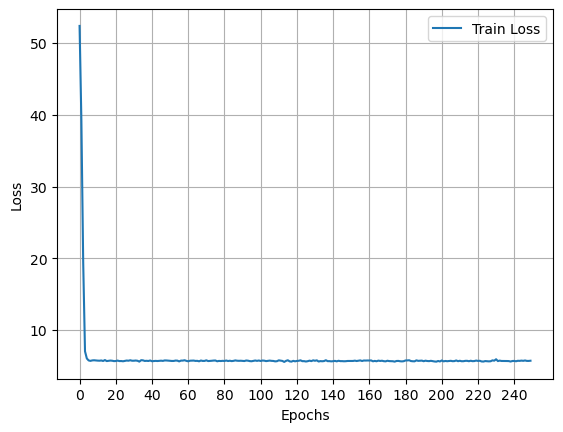

In [11]:
def create_plt_loss(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

create_plt_loss(history, x_tick_min = 0, 
                x_tick_max =  250, x_tick_step=20)

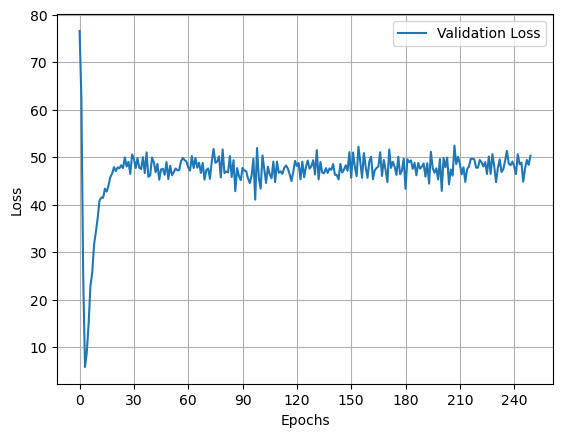

In [12]:
def create_plt_val_los(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

    
create_plt_val_los(history, x_tick_min = 0,x_tick_max=250, x_tick_step=30)

In [13]:
# Beispiel für die Modellbewertung
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


4/4 [==============================] - 0s 991us/step - loss: 298.5027
Test Loss: 298.502685546875


In [14]:
predictions = model.predict(X_test)
predictions.shape

4/4 [==============================] - 0s 538us/step


(98, 1)

In [15]:
y_test.shape, predictions.shape

((98,), (98, 1))

In [16]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions.flatten()
})
results_df

,True Values,Predicted Values
0,18.23,8.296927
1,18.27,8.105674
2,18.33,7.585331
3,18.39,6.491227
4,18.42,9.118733
...,...,...
93,35.42,8.997166
94,36.84,7.648570
95,41.32,7.810659
96,47.22,9.483434


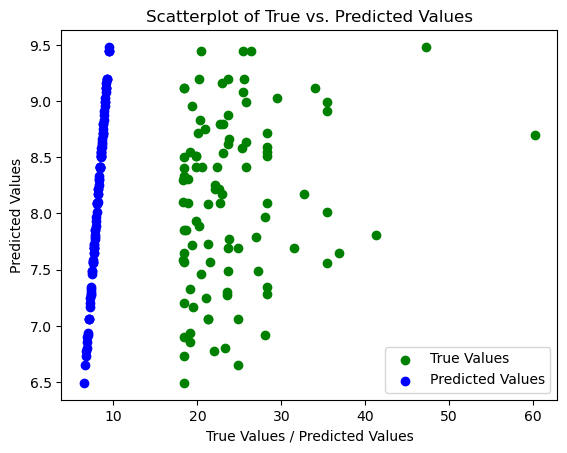

In [17]:
# Scatterplot für "True Values" in Grün
plt.scatter(results_df["True Values"], results_df["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df["Predicted Values"], results_df["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Ende Model 1

# Model 2 

2 Model: LSTM

In [18]:
# Model infrastructure
model_2 = Sequential([
    InputLayer(input_shape=(X_train.shape[1], 1), name='Input'),
    LSTM(units=2, return_sequences=True, activation="relu", name='layer1'),
    LSTM(units=2, return_sequences=False, activation="relu", name='layer2'),
    Dense(units=1, name='Output')
])

    

In [19]:
model_2.compile(optimizer='adam', loss='mean_squared_error')     
model_2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 2, 2)              32        
                                                                 
 layer2 (LSTM)               (None, 2)                 40        
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_2 = model_2.fit(X_train, y_train, epochs=175, batch_size=1, validation_data=(X_valid, y_valid))
history_2

Epoch 1/175
700/700 [==============================] - 1s 1ms/step - loss: 51.6823 - val_loss: 194.9525
Epoch 2/175
700/700 [==============================] - 1s 788us/step - loss: 43.6293 - val_loss: 178.4622
Epoch 3/175
700/700 [==============================] - 1s 951us/step - loss: 36.6500 - val_loss: 163.1276
Epoch 4/175
700/700 [==============================] - 1s 789us/step - loss: 30.6355 - val_loss: 149.2242
Epoch 5/175
700/700 [==============================] - 1s 789us/step - loss: 25.4989 - val_loss: 136.4777
Epoch 6/175
700/700 [==============================] - 1s 788us/step - loss: 21.1463 - val_loss: 124.8456
Epoch 7/175
700/700 [==============================] - 1s 819us/step - loss: 17.5350 - val_loss: 114.3404
Epoch 8/175
700/700 [==============================] - 1s 790us/step - loss: 14.5822 - val_loss: 104.8492
Epoch 9/175
700/700 [==============================] - 1s 786us/step - loss: 12.2347 - val_loss: 96.5534
Epoch 10/175
700/700 [===========================

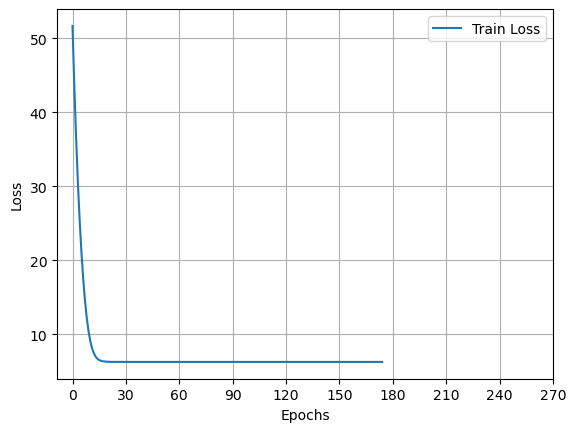

In [21]:
create_plt_loss(history_2, x_tick_min = 0,x_tick_max=275, x_tick_step=30)

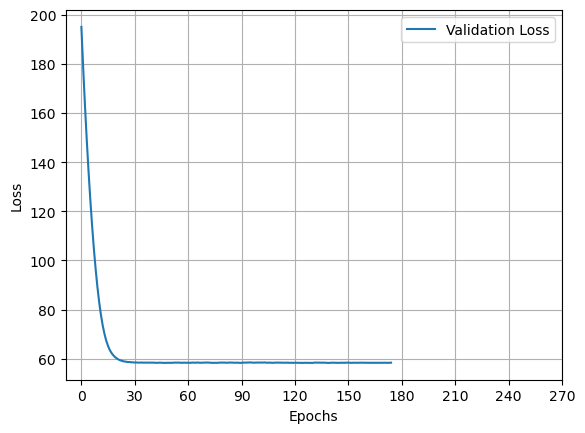

In [22]:
create_plt_val_los(history_2, x_tick_min = 0,x_tick_max=275, x_tick_step=30)  

In [23]:
test_loss_2 = model_2.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)

4/4 [==============================] - 0s 948us/step - loss: 334.8305
Test Loss of Model 1: 298.502685546875
Test Loss of Model 2: 334.8304748535156


In [24]:
predictions_2 = model_2.predict(X_test)
predictions_2.shape

4/4 [==============================] - 0s 1ms/step


(98, 1)

In [25]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df_2 = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions_2.flatten()
})
results_df_2

,True Values,Predicted Values
0,18.23,7.060156
1,18.27,7.060156
2,18.33,7.060156
3,18.39,7.060156
4,18.42,7.060156
...,...,...
93,35.42,7.060156
94,36.84,7.060156
95,41.32,7.060156
96,47.22,7.060156


In [26]:
results_df_2.columns

Index(['True Values', 'Predicted Values'], dtype='object')

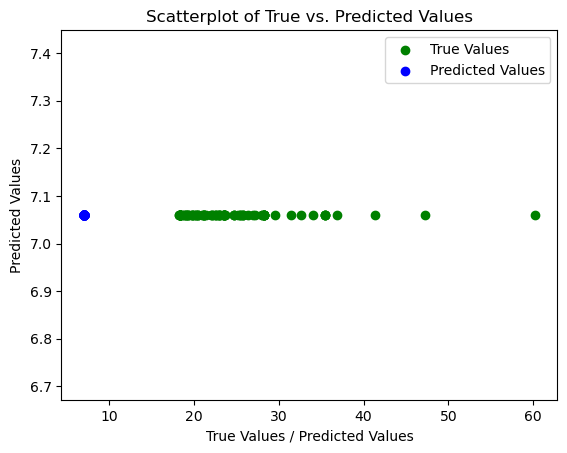

In [27]:
# Scatterplot für "True Values" in Grün
plt.scatter(results_df_2["True Values"], results_df_2["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df_2["Predicted Values"], results_df_2["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Model 3

In [28]:
model_3 = keras.models.Sequential([ 
    keras.layers.SimpleRNN(2, return_sequences=True, input_shape=(X_train.shape[1], 1), activation="relu", name="Input"),
    keras.layers.SimpleRNN(20, return_sequences=True, activation="relu", name="layer1"),
    keras.layers.SimpleRNN(3, return_sequences=False, activation="relu", name="layer2"),
    keras.layers.Dense(1, name='Output')
])
model_3.compile(loss="mean_squared_error", optimizer="adam")  
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (SimpleRNN)           (None, 2, 2)              8         
                                                                 
 layer1 (SimpleRNN)          (None, 2, 20)             460       
                                                                 
 layer2 (SimpleRNN)          (None, 3)                 72        
                                                                 
 Output (Dense)              (None, 1)                 4         
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_3.compile(loss="mean_squared_error", optimizer="adam")   
history_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) #batch_Size = 1
history_3

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 56.2299 - val_loss: 212.6329
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 55.6886 - val_loss: 211.9988
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 55.3810 - val_loss: 211.3674
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 55.0747 - val_loss: 210.7385
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 54.7703 - val_loss: 210.1106
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 54.4664 - val_loss: 209.4847
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 54.1648 - val_loss: 208.8589
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 53.8650 - val_loss: 208.2330
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 53.5643 - val_loss: 207.6161
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 53.2684 - val_loss

In [30]:
test_loss_3 = model_3.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)
print("Test Loss of Model 3:", test_loss_3)

4/4 [==============================] - 0s 934us/step - loss: 615.2222
Test Loss of Model 1: 298.502685546875
Test Loss of Model 2: 334.8304748535156
Test Loss of Model 3: 615.2222290039062


In [ ]:
create_plt_loss(history_3, x_tick_min = 0,x_tick_max=12, x_tick_step=2)

In [ ]:
create_plt_val_los(history_3, x_tick_min = 0,x_tick_max=12, x_tick_step=2)

# Model 4
Ein paper das besagt das dropouts model immer besser machen 
[text](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer,)

In [ ]:
# Model infrastructure
model_4 = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(30, activation="relu", name="layer1"),
    Dropout(0.001),
    Dense(40, name="layer2"),
    Dense(1, name="Output"),
])



optimizer_4 = Adam(learning_rate=0.001)  # Default learning rate
model_4.compile(loss='mean_squared_error', optimizer=optimizer_4)  # Using MSE for loss and MAE for metrics
model_4.summary()

In [ ]:
history_4 = model_4.fit(X_train, y_train, epochs=33, validation_data=(X_valid, y_valid))
history_4

In [ ]:
test_loss_4 = model_4.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)
print("Test Loss of Model 3:", test_loss_3)
print("Test Loss of Model 4:", test_loss_4)

In [ ]:
create_plt_loss(history_4, x_tick_min = 0,x_tick_max=42, x_tick_step=2)

In [ ]:
create_plt_loss(history_4, x_tick_min = 0,x_tick_max=42, x_tick_step=2)

# New Dataset housing

In [ ]:
df_housing = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/housing.csv', sep=",", index_col=False).round(2)
df_housing

In [ ]:
df_housing.isnull().sum()
df_housing = df_housing.dropna()
df_housing.isnull().sum()


In [ ]:
df_housing.columns
X = df_housing[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]   
y = df_housing[['median_house_value']]

In [ ]:
X_train,y_train,X_valid,y_valid,X_test,y_test = train_test_valid_split(df_housing, train_size=7500, test_size=1600, valid_size_min=1400, valid_size_max=2000)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

In [ ]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

In [ ]:
X_train.shape

In [ ]:
model_housing = Sequential([
    InputLayer(input_shape=[None, 7500, 5], name="Input"),
    Dense(20, activation="relu", name="layer1"),
    Dense(30, activation="relu", name="layer2"),
    Dense(8, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model_housing.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model_housing.summary()

In [ ]:
history_housing = model_housing.fit(X_train,y_train, epochs=5)
history_housing

In [ ]:
50237677568.0000
21635821568.0000

In [ ]:
create_plt_loss(history_housing, x_tick_min = 0,x_tick_max=5, x_tick_step=1)